In [ ]:
!pwd

/content


In [ ]:
# Test for GPUs
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jan  4 15:42:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Memory status in GPUs
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Install all the relevant packages
# !pip install torch==1.1.0
# !pip install transformers
# !pip install sentence_transformers
# !pip install finbert-embedding
# !pip install finbert-embedding==0.1.4
# !pip install catboost 
# !pip install lightgbm 
# !pip install xgboost
# !pip install category_encoders

In [ ]:
# Need to add the Final Dataset for the EDA
# ref: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
# ref: https://blog.jovian.ai/whatsapp-message-exploratory-data-analysis-eda-538560ee1c99
# Drive Location: '/content/drive/MyDrive/Readability-Project/data/final_data/all_new_finterm_V2.csv'

In [ ]:
# Check for the versions of the packages
import pandas as pd
import numpy as np
# import category_encoders as ce
import lightgbm as lgbm
# import catboost as cb
import xgboost as xgb
import torch
# import transformers
# import sentence_transformers as st
import sklearn

print(pd.__version__)
print(np.__version__)
# print(ce.__version__)
print(lgbm.__version__)
# print(cb.__version__)
print(xgb.__version__)
print(torch.__version__)
# print(st.__version__)
print(sklearn.__version__)

1.1.5
1.19.5
2.2.3
0.90
1.10.0+cu111
1.0.1


In [3]:
import pandas as pd
# df_final_FR = pd.read_csv("all_new_finterm_V2.csv")
df_final_FR = pd.read_csv("term_unique_13K_all_in_one_NEW_CLEANED_FINAL_12_columns.csv")

In [4]:
df_final_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13112 entries, 0 to 13111
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   terms                         13112 non-null  object 
 1   definitions                   13112 non-null  object 
 2   source                        13112 non-null  object 
 3   assigned_readability          13112 non-null  int64  
 4   flesch_reading_ease           13112 non-null  float64
 5   flesch_kincaid_grade          13112 non-null  float64
 6   smog_index                    13112 non-null  float64
 7   coleman_liau_index            13112 non-null  float64
 8   automated_readability_index   13112 non-null  float64
 9   dale_chall_readability_score  13112 non-null  float64
 10  linsear_write_formula         13112 non-null  float64
 11  gunning_fog                   13112 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df_final_FR.shape

(13112, 12)

In [6]:
df_final_FR.head()

terms  ... gunning_fog
0  adjusted present value (apv)  ...       12.00
1                  agency costs  ...       14.25
2  annual percentage rate (apr)  ...       16.21
3                       annuity  ...       14.00
4                   annuity due  ...       12.00

[5 rows x 12 columns]

In [ ]:
(df_final_FR['source'].value_counts()/len(df_final_FR))*100

investopedia          45.347773
palgrave              29.934411
opod                   4.019219
zvi                    3.752288
economist              3.485357
fmi                    2.951495
6_8_louis              2.608298
sam                    2.524405
9_12_louis             1.433801
prin                   1.349908
ncert                  0.877059
ncert_keec111          0.724527
ncert_kest             0.404210
ncert_class12_econ     0.312691
pre_louis              0.274558
Name: source, dtype: float64

In [7]:
# Get the frequency distribution of the source wise distribution
# Check for the missing values
df_final_FR.isnull().sum()

terms                           0
definitions                     0
source                          0
assigned_readability            0
flesch_reading_ease             0
flesch_kincaid_grade            0
smog_index                      0
coleman_liau_index              0
automated_readability_index     0
dale_chall_readability_score    0
linsear_write_formula           0
gunning_fog                     0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [ ]:
print('Number of unique FinTerm=>',len(df_final_FR['terms'].unique()))

Number of unique FinTerm=> 13112


No need to run the following block as the dataset has been made unique at "terms" level.

In [ ]:
# Check for a few terms which have occured more than twice
# from sys import argv
# from collections import Counter, defaultdict
# Find a duplicate rows
# duplicateDFRow = df_final_FR[df_final_FR.duplicated(['terms'])]
# print(duplicateDFRow)
# duplicateDFRow.head(20)

In [ ]:
# duplicateDFRow.shape

Basic Pre-processing - Term Expansion in the definitions

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_final_FR['definitions']=df_final_FR['definitions'].apply(lambda x:expand_contractions(x))
df_final_FR['terms']=df_final_FR['terms'].apply(lambda x:expand_contractions(x))

In [ ]:
# !pip install spacy
# !pip install -U matplotlib
# !pip install -U wordcloud

In [ ]:
# remove the digits and punctuations, stopwords
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df_final_FR['definitions']=df_final_FR['definitions'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [ ]:
# Remove punctuations
df_final_FR['definitions']=df_final_FR['definitions'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
# Removing extra spaces
df_final_FR['definitions']=df_final_FR['definitions'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
# Remove digits and words containing digits
df_final_FR['definitions']=df_final_FR['definitions'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
# Lowercase the "definitions"
df_final_FR['definitions']=df_final_FR['definitions'].apply(lambda x: x.lower())
df_final_FR['terms']=df_final_FR['terms'].apply(lambda x: x.lower())

In [ ]:
# Check the text now
for index,text in enumerate(df_final_FR['definitions'][35:40]):
  print('FinTerm Definition %d:\n'%(index+1),text)

FinTerm Definition 1:
 bill await payment final customer company 
FinTerm Definition 2:
 par value convertible bond divide number share exchange 
FinTerm Definition 3:
 number share
FinTerm Definition 4:
 exchange bond convert security holder option similarly convertible preferred stock 
FinTerm Definition 5:
 business legally separate owner 


In [ ]:
# Create a grouped data based on Source
df_grouped=df_final_FR[['terms','definitions','source']].groupby(by='source').agg(lambda x:' '.join(x))
df_grouped.head()

terms                                        definitions
source                                                                                                            
6_8_louis     adjustable-rate mortgage (arm) adjusted gross ...  mortgage permit lender periodically adjust int...
9_12_louis    ability-to-pay principle absolute good actual ...  idea taxis levy person accord person shoulder ...
economist     advertising agency costs agricultural policy a...  firm advertise good service waste economic res...
fmi           advances adverse selection agency theory ameri...  discount loan  problem create asym metric info...
investopedia  0x protocol 1%/10 net 30 10-k 10-k wrap 10-q s...   protocol open protocol enable peer peer excha...

In [ ]:
# Create a grouped data based on terms
# df_grouped_terms=df_final_FR[['terms','source']].groupby(by='source').agg(lambda x:' '.join(x))
# df_grouped_terms.head()

In [ ]:
# Create the term-document matrix
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['definitions'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(13)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aaa  aagr  aams  ...  ﬁfree  ﬁswept  ﬁsyntheticﬂ  ﬁtruth
source                                   ...                                    
6_8_louis            0    1     0     0  ...      0       0            0       0
9_12_louis           0    0     0     0  ...      0       0            0       0
economist            0    0     0     0  ...      0       0            0       0
fmi                  0    0     0     0  ...      0       1            0       1
investopedia         1    6     1     1  ...      0       0            0       0
ncert                0    0     0     0  ...      0       0            0       0
ncert_class12_econ   0    0     0     0  ...      0       0            0       0
ncert_keec111        0    0     0     0  ...      0       0            0       0
ncert_kest           0    0     0     0  ...      0       0            0       0
opod                 0    0     0     0  ...      0       0            0       0
palgrave             0    5     0     0  ...      0       0            0       0
pre_louis            0    0     0     0  ...      0       0            0       0
prin                 0    0     0     0  ...      0       0            0       0

[13 rows x 14085 columns]

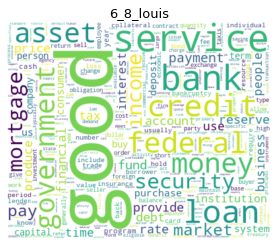

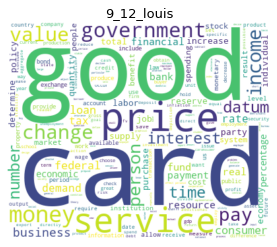

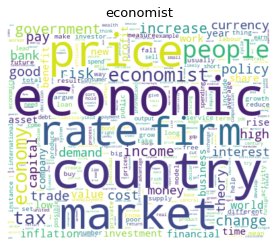

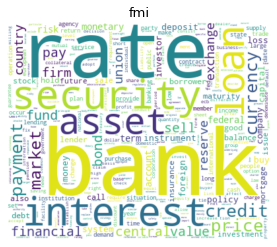

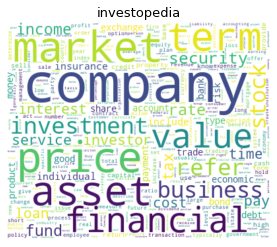

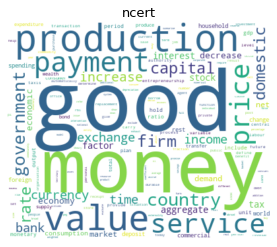

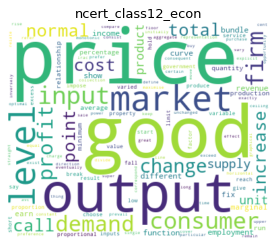

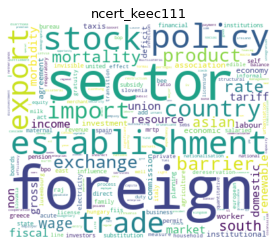

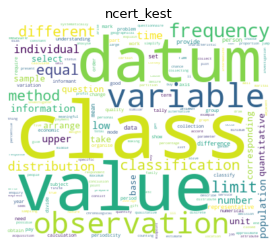

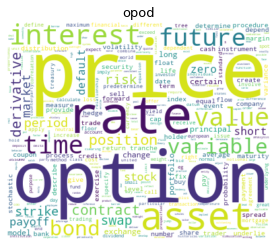

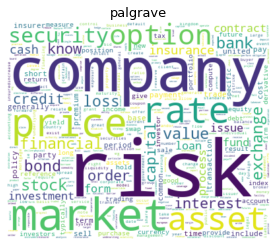

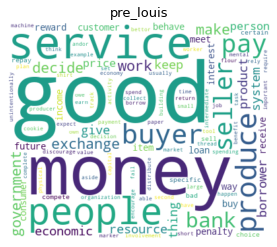

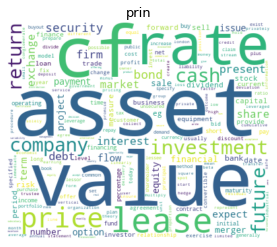

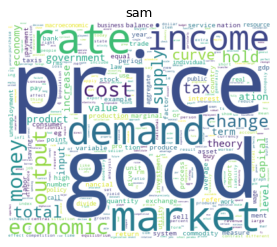

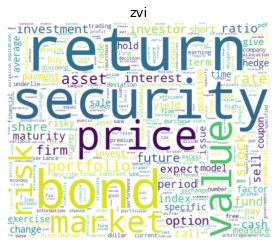

In [ ]:
# Create the word-cloud across sources
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
import collections
from wordcloud import WordCloud, STOPWORDS
other_stopwords_to_remove = ['\t','of']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, 
                 height=330, 
                #  max_words=150,
                 max_words=2000,
                 stopwords = stopwords,
                #  colormap="Dark2",
                 background_color='white'
                 ).generate_from_frequencies(data)
  plt.figure(figsize=(7,4))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,source in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[source].sort_values(ascending=False),source)
    # generate_wordcloud(df_dtm[source],source)
# df_dtm.columns

Generate wordcloud for the terms in the data

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_final_FR['terms']=df_final_FR['terms'].apply(lambda x:expand_contractions(x))

In [ ]:
# remove the digits and punctuations, stopwords
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df_final_FR['terms']=df_final_FR['terms'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

# Remove punctuations
df_final_FR['terms']=df_final_FR['terms'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# Removing extra spaces
df_final_FR['terms']=df_final_FR['terms'].apply(lambda x: re.sub(' +',' ',x))

# Remove digits and words containing digits
df_final_FR['terms']=df_final_FR['terms'].apply(lambda x: re.sub('\w*\d\w*','', x))

# Lowercase the "definitions"
# df_final_FR['definitions']=df_final_FR['definitions'].apply(lambda x: x.lower())
# df_final_FR['terms']=df_final_FR['terms'].apply(lambda x: x.lower())
# Check the text now
for index,text in enumerate(df_final_FR['terms'][50:60]):
  print('FinTerms %d:\n'%(index+1),text)

FinTerms 1:
 discounted cash flow dcf 
FinTerms 2:
 dividend discount model
FinTerms 3:
 dividend yield
FinTerms 4:
 du pont formula
FinTerms 5:
 duration
FinTerms 6:
 economic depreciation
FinTerms 7:
 economic income
FinTerms 8:
 economic value add eva 
FinTerms 9:
 efficient portfolio
FinTerms 10:
 equipment trust certificate


In [ ]:
# Create a grouped data based on Source
df_grouped_terms=df_final_FR[['terms','source']].groupby(by='source').agg(lambda x:' '.join(x))
df_grouped_terms.head()

terms
source                                                         
6_8_louis     adjustable rate mortgage arm  adjusted gross i...
9_12_louis    ability pay principle absolute good actual out...
economist     advertising agency cost agricultural policy ag...
fmi           advance adverse selection agency theory americ...
investopedia   protocol  net    wrap  sec form  treasury not...

In [ ]:
# Create the term-document matrix
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data_terms=cv.fit_transform(df_grouped['terms'])
df_dtm_terms = pd.DataFrame(data_terms.toarray(), columns=cv.get_feature_names())
df_dtm_terms.index=df_grouped.index
df_dtm_terms.head(13)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


03  0x  10  100  ...  zone  zones  zuckerberg  zurich
source                               ...                                 
6_8_louis            0   0   0    0  ...     0      0           0       0
9_12_louis           3   0   0    0  ...     0      0           0       0
economist            0   0   0    0  ...     1      0           0       0
fmi                  0   0   0    0  ...     0      0           0       0
investopedia         0   1  12    2  ...     0      1           1       0
ncert                0   0   0    0  ...     0      0           0       0
ncert_class12_econ   0   0   0    0  ...     0      0           0       0
ncert_keec111        0   0   0    0  ...     1      0           0       0
ncert_kest           0   0   0    0  ...     0      0           0       0
opod                 0   0   0    0  ...     0      0           0       0
palgrave             0   0   0    1  ...     1      0           0       1
pre_louis            0   0   0    0  ...     0      0           0       0
prin                 0   0   0    0  ...     0      0           0       0

[13 rows x 6717 columns]

In [ ]:
# !pip install -U matplotlib
# !pip install -U wordcloud

In [ ]:
# import collections
# from wordcloud import WordCloud, STOPWORDS
# other_stopwords_to_remove = ['\t', 'of']
# STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
# stopwords = set(STOPWORDS)

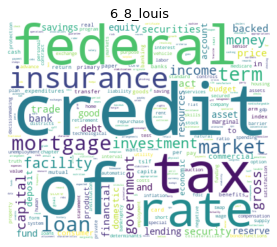

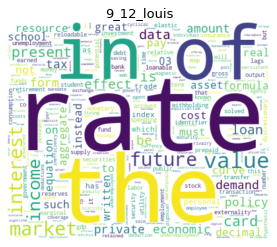

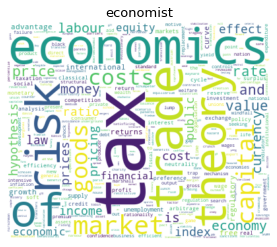

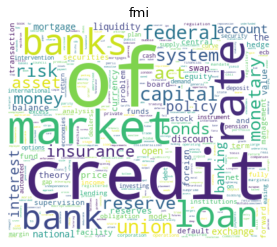

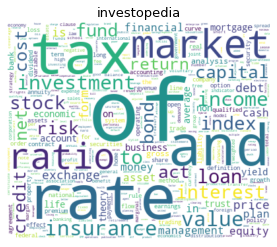

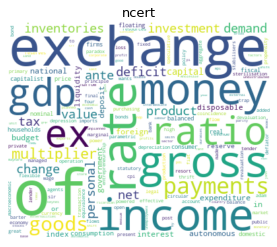

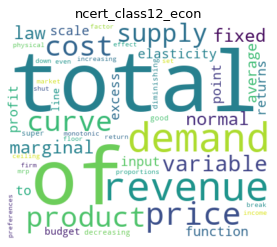

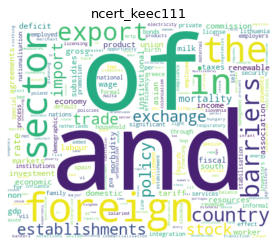

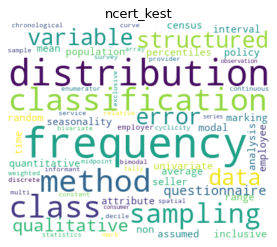

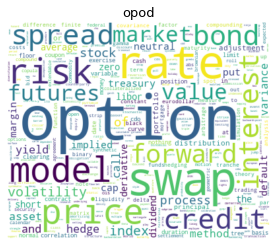

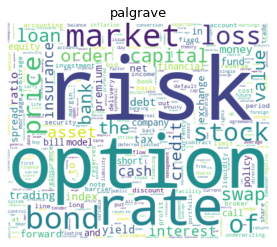

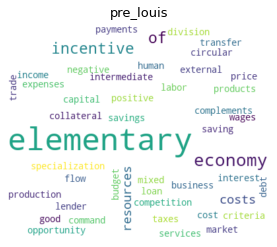

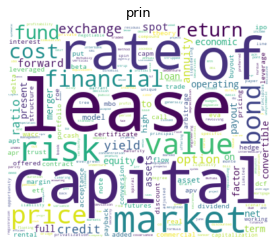

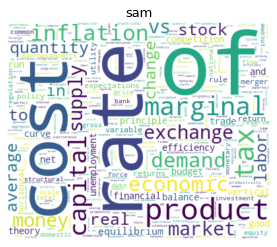

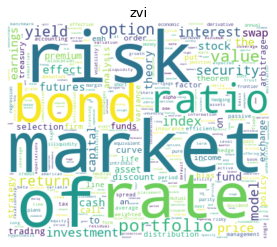

In [ ]:
# Generate WC for the terms in the document
# Create the word-cloud across sources
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
import collections
from wordcloud import WordCloud, STOPWORDS
other_stopwords_to_remove = ['\t','of']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, 
                 height=330, 
                #  max_words=150,
                 max_words=1000,
                 stopwords = stopwords,
                #  colormap="Dark2",
                 background_color='white'
                 ).generate_from_frequencies(data)
  plt.figure(figsize=(8,4))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
df_dtm_terms=df_dtm_terms.transpose()

# Plotting word cloud for each product
for index,terms in enumerate(df_dtm_terms.columns):
    generate_wordcloud(df_dtm_terms[terms].sort_values(ascending=False),terms)
    
# df_dtm.columns

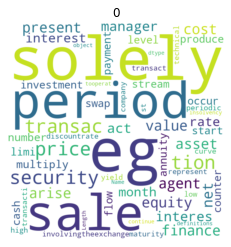

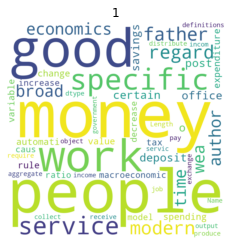

In [ ]:
# Alternative WC formations across assigned_readability and 
import collections
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

other_stopwords_to_remove = ['\t','of']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

for source in df_final_FR['assigned_readability'].unique():
  data_source = df_final_FR[df_final_FR['assigned_readability']==source]
  text = data_source['definitions']
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=2000,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(source)
  plt.axis("off")
  plt.show()

In [ ]:
# Get the frequency distribution of terms across various Sources
#Creating a new dataframe by copying the old dataframe
df_finRad = df_final_FR.copy()
df_finRad['Number_of_terms'] = [1]* df_finRad.shape[0]

#We are groupby the user and messages together then we will use count() to count the messages for each of user
df_finRad = df_finRad.groupby('source')['Number_of_terms'].count().sort_values(ascending = False).reset_index()
df_finRad

source  Number_of_terms
0         investopedia             5946
1             palgrave             3925
2                 opod              527
3                  zvi              492
4            economist              457
5                  fmi              387
6            6_8_louis              342
7                  sam              331
8           9_12_louis              188
9                 prin              177
10               ncert              115
11       ncert_keec111               95
12          ncert_kest               53
13  ncert_class12_econ               41
14           pre_louis               36

In [ ]:
df_finRad['Number_of_terms'].value_counts()

95      1
188     1
5946    1
342     1
3925    1
115     1
177     1
41      1
527     1
36      1
492     1
331     1
457     1
53      1
387     1
Name: Number_of_terms, dtype: int64

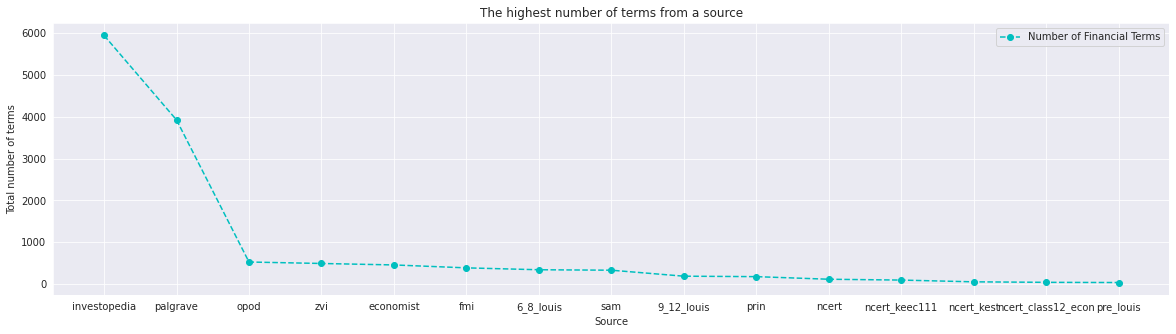

In [ ]:
# Data Visualisation
# Resize the  figure size
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

plt.figure(figsize=(20, 5))

# Here we are ploting the line chart using plt.plot 
plt.plot(df_finRad.source, df_finRad.Number_of_terms, 'o--c')  

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Source')
plt.ylabel('Total number of terms')

plt.title("The highest number of terms from a source")
plt.legend(['Number of Financial Terms']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


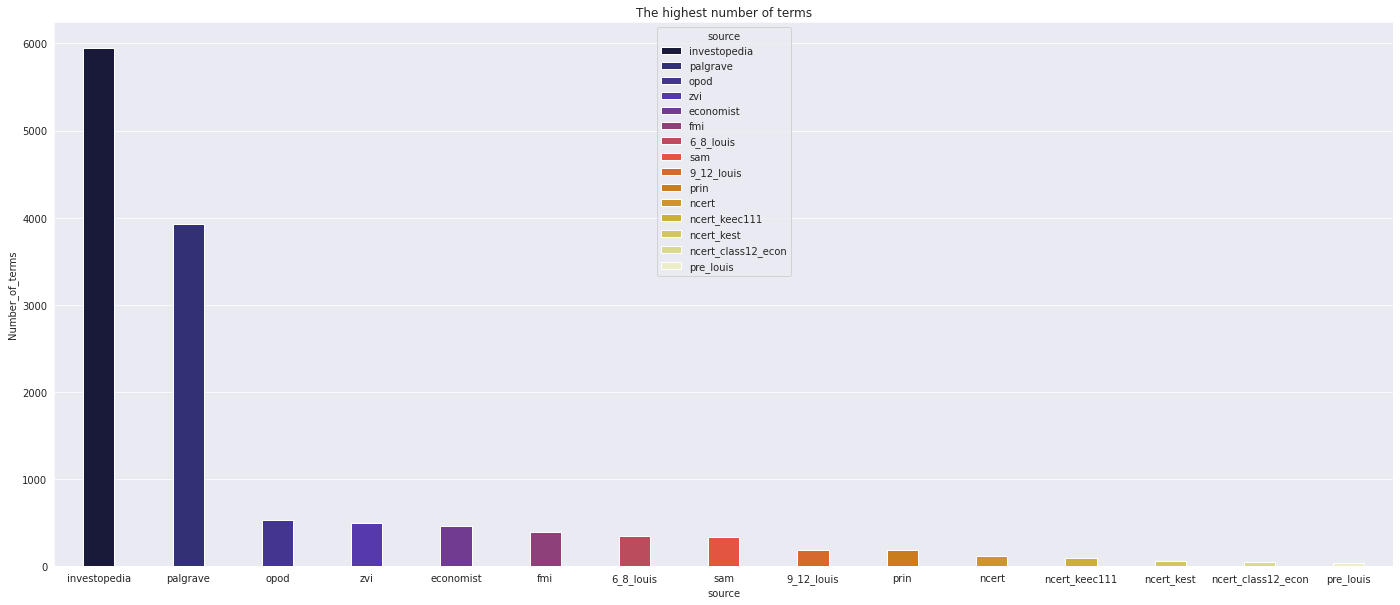

In [ ]:
#Formating
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (24, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(df_finRad.source,
            df_finRad.Number_of_terms,
            hue='source',
            data=df_finRad,
            dodge=False,
            palette="CMRmap")

#The title of our charts
plt.title("The highest number of terms")

#Change the width of the bar chart plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()

In [ ]:
# Distribution of readability Score across assigned_readability
# We can do some further EDA for a pool of features as well

# Removed a few score as they are not native to the english language
# For more detail about the readability formulae:https://pypi.org/project/textstat/

score_attributes = [
       'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score',
       'linsear_write_formula', 'gunning_fog']


AR_1 = round(df_final_FR[df_final_FR['assigned_readability'] == 1][score_attributes].describe(),2).T
AR_0 = round(df_final_FR[df_final_FR['assigned_readability'] == 0][score_attributes].describe(),2).T
pd.concat([AR_1, AR_0], axis=1, keys=['AR=1 ', 'AR=0'])

AR=1                 ...   AR=0               
                               count   mean    std  ...    50%    75%     max
flesch_reading_ease           7604.0  41.54  21.57  ...  44.07  58.79  120.21
flesch_kincaid_grade          7604.0  12.92   3.96  ...  11.30  14.20   47.40
smog_index                    7604.0   6.02   7.12  ...   0.00   0.00   26.50
coleman_liau_index            7604.0  12.36   3.59  ...  11.68  14.43   51.36
automated_readability_index   7604.0  14.52   4.72  ...  12.20  15.60   58.80
dale_chall_readability_score  7604.0  10.41   1.84  ...  10.83  12.10   27.42
linsear_write_formula         7604.0  14.59   5.53  ...  11.00  15.00   65.00
gunning_fog                   7604.0  14.94   4.40  ...  13.90  17.03   49.85

[8 rows x 16 columns]

In [ ]:
# Check for the correlations among all the scores
# Finding the Correlation values for all the features
(round(df_final_FR[df_final_FR['assigned_readability'] == 1][score_attributes].corr(),2))

flesch_reading_ease  ...  gunning_fog
flesch_reading_ease                          1.00  ...        -0.71
flesch_kincaid_grade                        -0.87  ...         0.87
smog_index                                   0.09  ...        -0.15
coleman_liau_index                          -0.71  ...         0.54
automated_readability_index                 -0.70  ...         0.83
dale_chall_readability_score                -0.56  ...         0.45
linsear_write_formula                       -0.32  ...         0.70
gunning_fog                                 -0.71  ...         1.00

[8 rows x 8 columns]

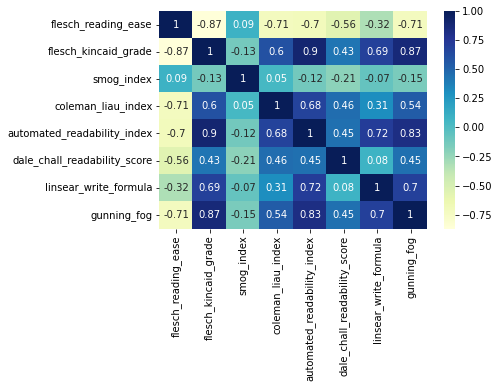

In [ ]:
# Generate the correlation heatmap
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
# plotting correlation heatmap
dataplot = sb.heatmap((round(df_final_FR[df_final_FR['assigned_readability'] == 1][score_attributes].corr(),2)), 
                      cmap="YlGnBu", 
                      annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
(round(df_final_FR[df_final_FR['assigned_readability'] == 0][score_attributes].corr(),2))

flesch_reading_ease  ...  gunning_fog
flesch_reading_ease                          1.00  ...        -0.76
flesch_kincaid_grade                        -0.86  ...         0.87
smog_index                                  -0.03  ...         0.01
coleman_liau_index                          -0.77  ...         0.59
automated_readability_index                 -0.73  ...         0.77
dale_chall_readability_score                -0.56  ...         0.46
linsear_write_formula                       -0.35  ...         0.68
gunning_fog                                 -0.76  ...         1.00

[8 rows x 8 columns]

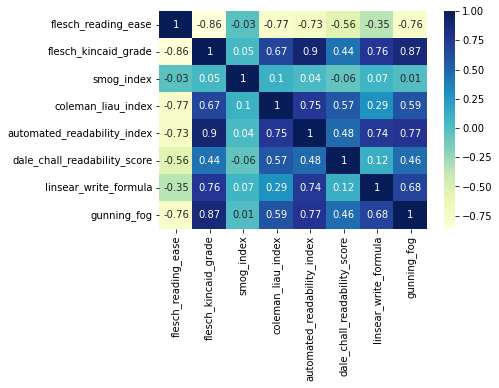

In [ ]:
# Generate the correlation heatmap
import seaborn as sb
# plotting correlation heatmap
dataplot = sb.heatmap((round(df_final_FR[df_final_FR['assigned_readability'] == 0][score_attributes].corr(),2)), 
                      cmap="YlGnBu", 
                      annot=True)
  
# displaying heatmap
plt.show()

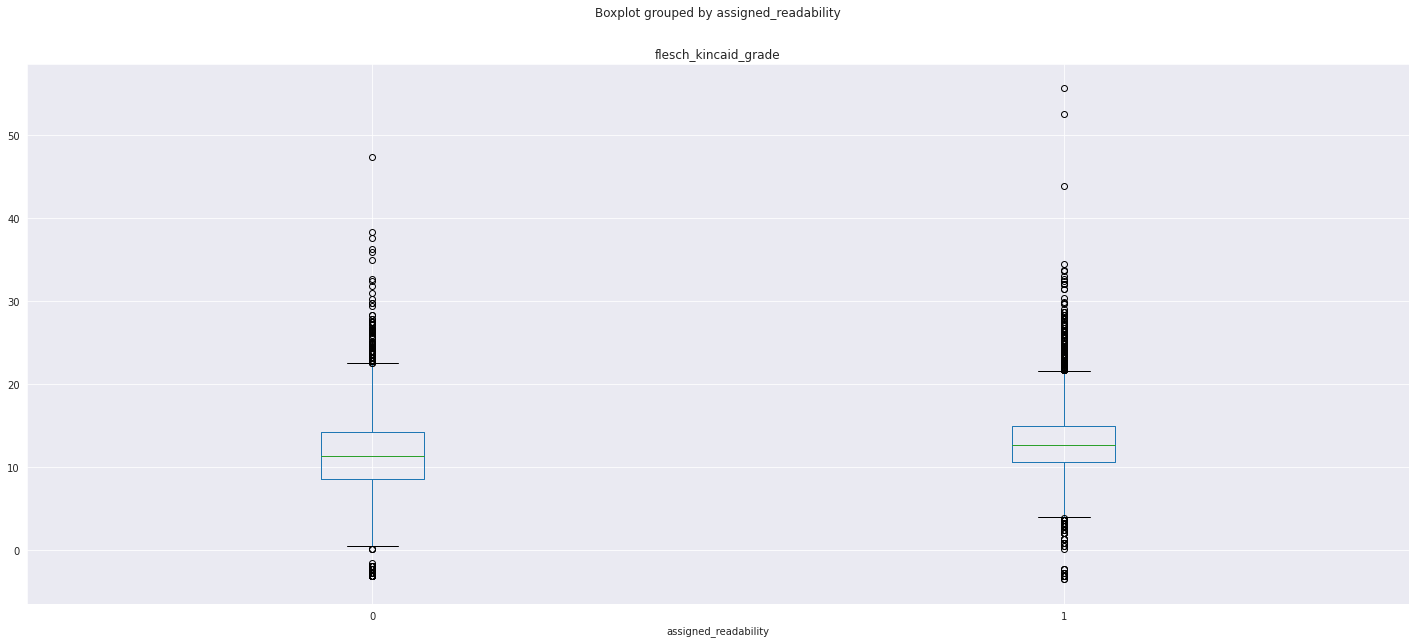

In [ ]:
# Plotting Box Plot of Age by Status
df_final_FR.boxplot(column=['flesch_kincaid_grade'], return_type='axes', by='assigned_readability')
plt.show()

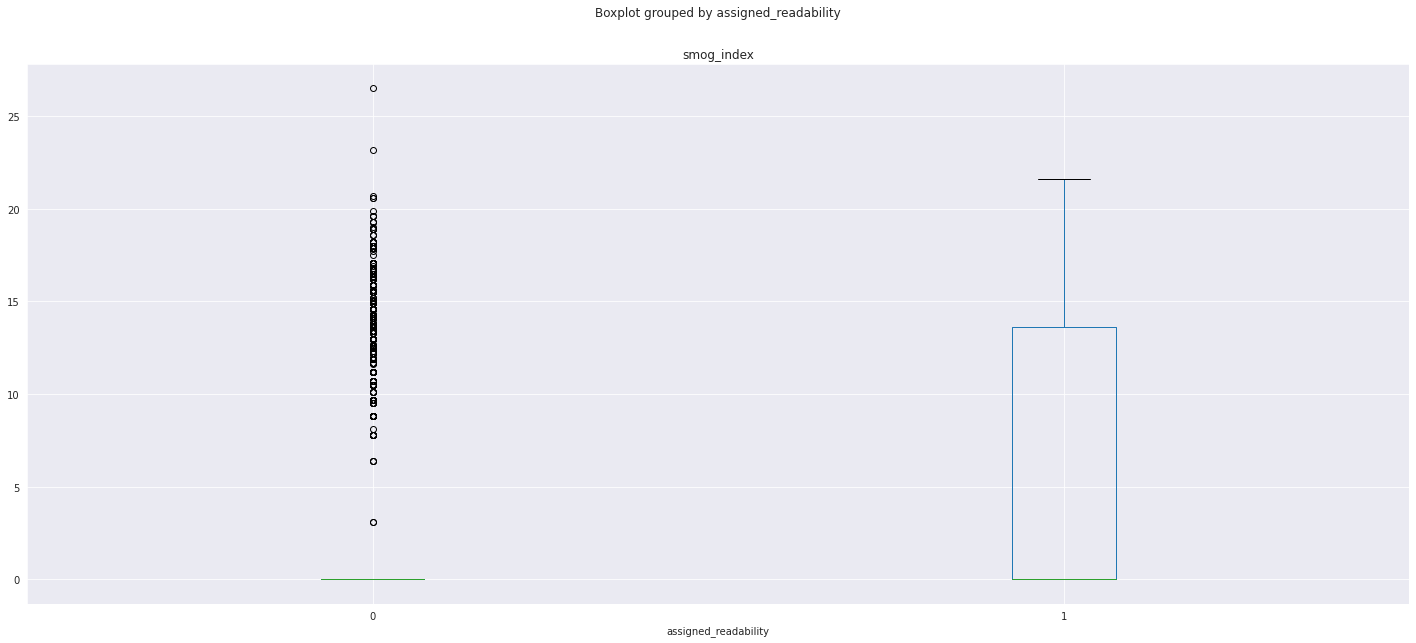

In [ ]:
df_final_FR.boxplot(column=['smog_index'], return_type='axes', by='assigned_readability')
plt.show()

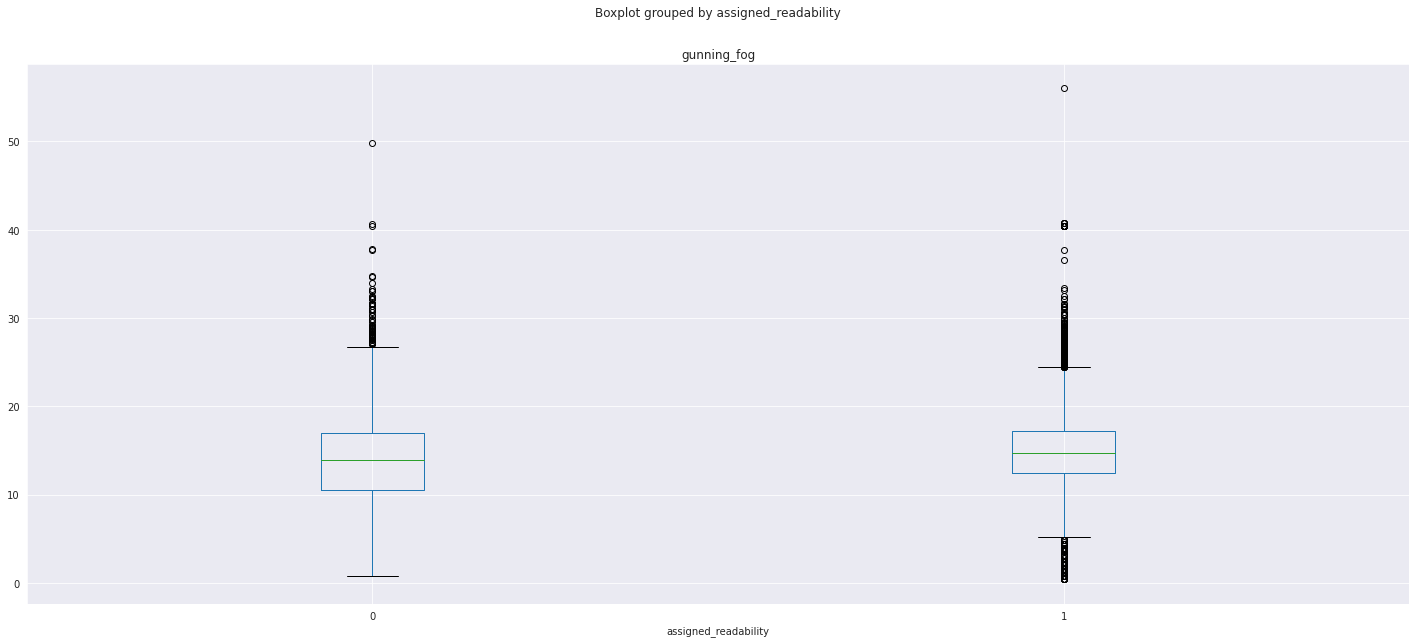

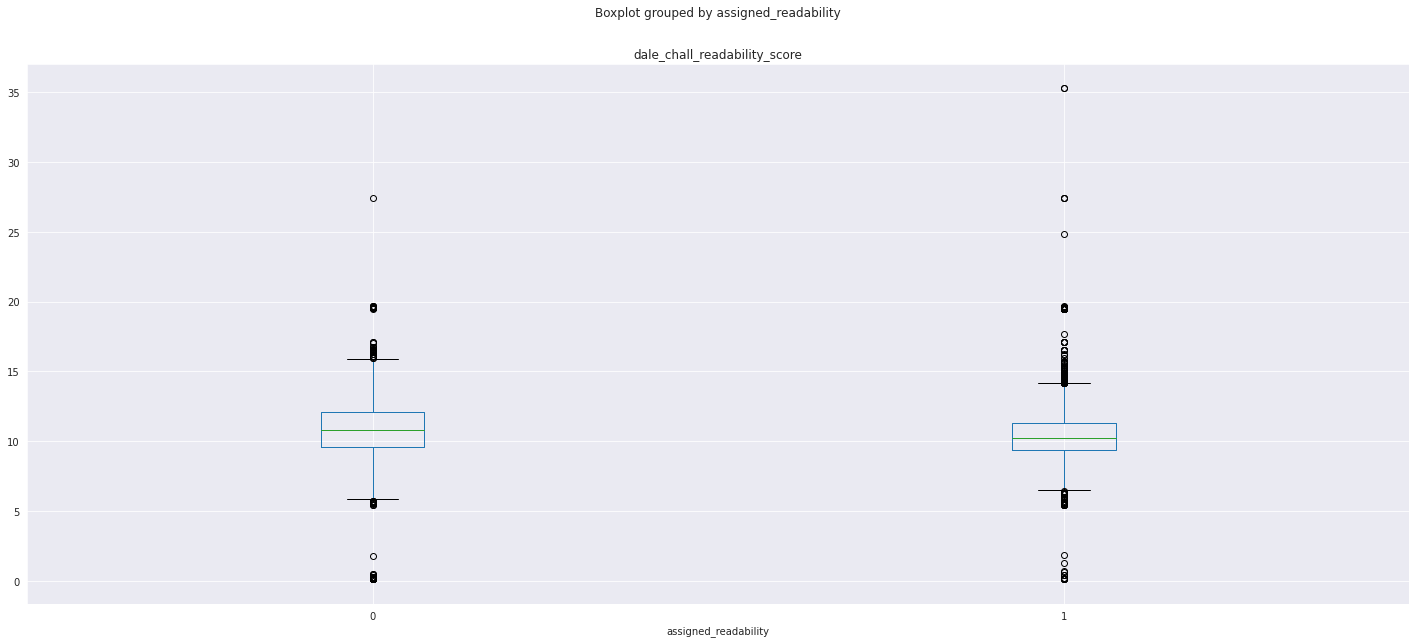

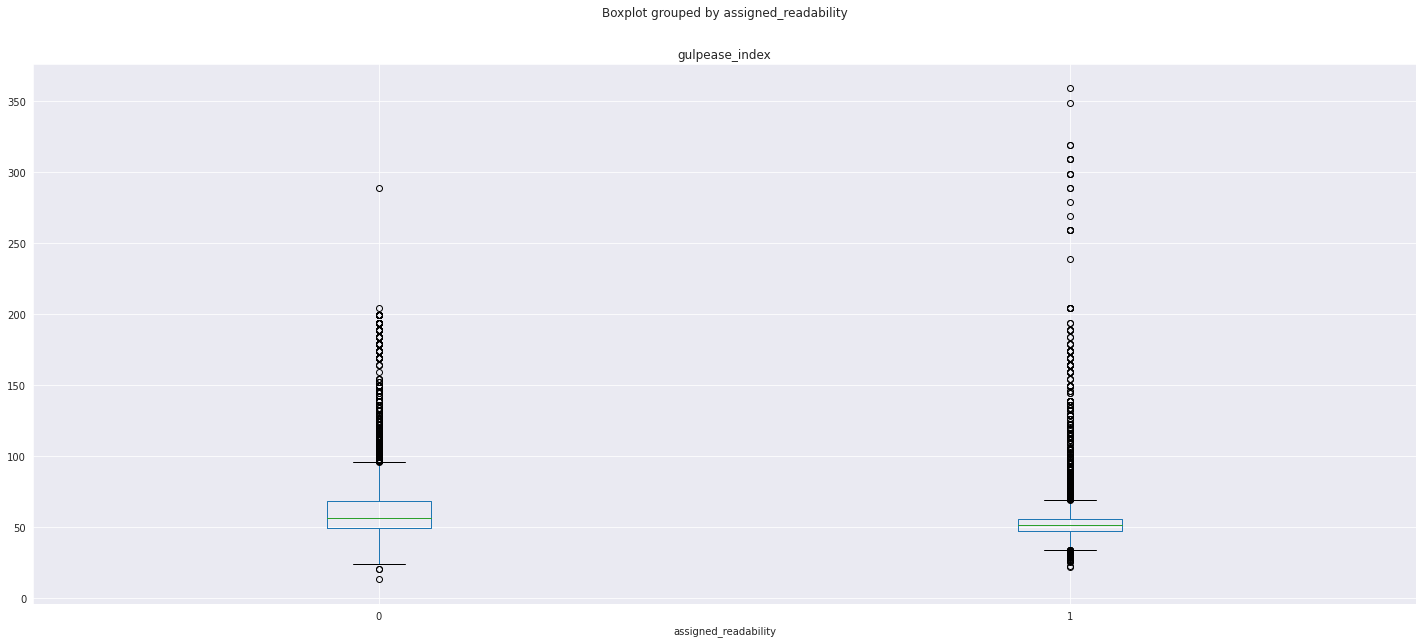

In [ ]:
df_final_FR.boxplot(column=['gunning_fog'], return_type='axes', by='assigned_readability')
plt.show()
df_final_FR.boxplot(column=['dale_chall_readability_score'], return_type='axes', by='assigned_readability')
plt.show()
df_final_FR.boxplot(column=['gulpease_index'], return_type='axes', by='assigned_readability')
plt.show()

Average number of sentences total, classwise, sourcewise

In [ ]:
import pandas as pd
# df_final_FR = pd.read_csv("all_new_finterm_V2.csv")
data = pd.read_csv("term_unique_13K_final.csv")

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm') # Load the English Model

def num_sents(txt):
  doc = nlp(txt)
  return len([i for i in doc.sents])

# data = df_final_FR.copy()
data['number_of_sentences'] = data['definitions'].apply(lambda x : num_sents(str(x)))
# print('Number of Sentences (Average):=>', round(data['number_of_sentences'].mean(),2))

In [ ]:
print('Number of Sentences (Average):=>', round(data['number_of_sentences'].mean(),2))
print('Number of Sentences (Max):=>', data['number_of_sentences'].max())
print('Number of Sentences (Min):=>', data['number_of_sentences'].min())
print('Number of Sentences (Median):=>', data['number_of_sentences'].median())

Number of Sentences (Average):=> 2.26
Number of Sentences (Max):=> 26
Number of Sentences (Min):=> 1
Number of Sentences (Median):=> 2.0


In [ ]:
# Check
print(data[data['number_of_sentences']==26].iloc[0,:]['terms'])
print(data[data['number_of_sentences']==26].iloc[0,:]['definitions'])
print(data[data['number_of_sentences']==26].iloc[0,:]['source'])
print(data[data['number_of_sentences']==26].iloc[0,:]['assigned_readability'])

Dim Sum Bond
Dim sum bond' is a slang term for bonds denominated in Chinese renminbi and issued in Hong Kong. Dim sum bonds are attractive to foreign investors who desire exposure to renminbi-denominated assets, but are restricted by China's capital controls from investing in domestic Chinese debt.investopedia140.1813.2013.4115.311.771415.7515.2215th and 16th grade81.976.3536.454.248.3333333340.39 Direct CostA direct cost is a price that can be directly tied to the production of specific goods or services. A direct cost can be traced to the cost object, which can be a service, product, or department. Direct and indirect costs are the two major types of expenses or costs that companies can incur. Direct costs are often variable costs, meaning they fluctuate with production levels such as inventory. However, some costs, such as indirect costs are more difficult to assign to a specific product. Examples of indirect costs include depreciation and administrative expenses.

                source  number_of_sentences
0            economist             3.719912
1         investopedia             2.638917
2                  sam             2.564955
3             palgrave             2.122293
4            6_8_louis             1.508772
5           9_12_louis             1.260638
6                ncert             1.252174
7           ncert_kest             1.245283
8                  zvi             1.229675
9                 prin             1.192090
10                 fmi             1.178295
11           pre_louis             1.166667
12                opod             1.146110
13  ncert_class12_econ             1.097561
14       ncert_keec111             1.010526


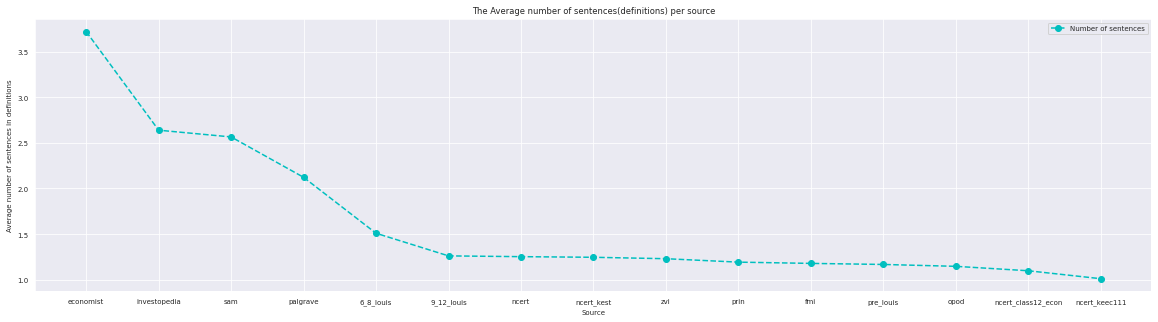

In [ ]:
# Source wise distribution of "number of sentences/terms"
# data.groupby('source')['number_of_sentences'].mean()
data_grp_nos = data.groupby('source')['number_of_sentences'].mean().sort_values(ascending = False).reset_index() 
print(data_grp_nos)
# Plot the same
# Data Visualisation
# Resize the  figure size
plt.figure(figsize=(20, 5))

# Here we are ploting the line chart using plt.plot 
plt.plot(data_grp_nos.source, data_grp_nos.number_of_sentences, 'o--c')  

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Source')
plt.ylabel('Average number of sentences in definitions')

plt.title("The Average number of sentences(definitions) per source")
plt.legend(['Number of sentences']);

In [ ]:
data.groupby('assigned_readability')['number_of_sentences'].mean()

assigned_readability
0    1.852941
1    2.549448
Name: number_of_sentences, dtype: float64

   assigned_readability  number_of_sentences
0                     1             2.549448
1                     0             1.852941


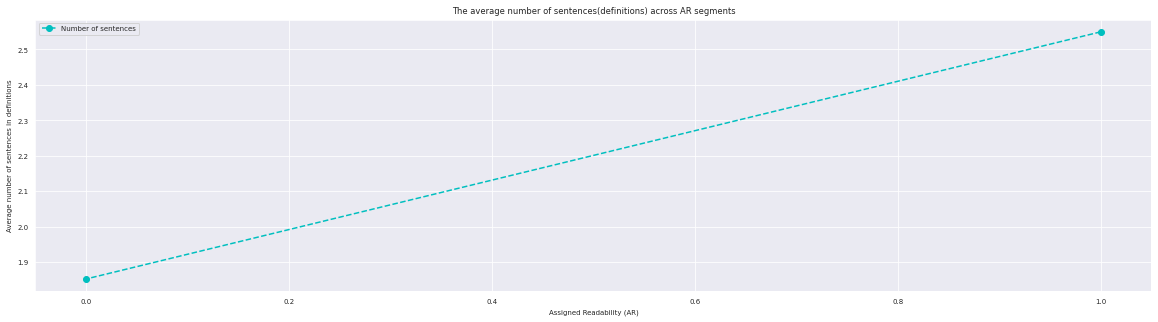

In [ ]:
# Source wise distribution of "number of sentences/terms"
# data.groupby('source')['number_of_sentences'].mean()
data_grp_nos = data.groupby('assigned_readability')['number_of_sentences'].mean().sort_values(ascending = False).reset_index() 
print(data_grp_nos)
# Plot the same
# Data Visualisation
# Resize the  figure size
plt.figure(figsize=(20, 5))

# Here we are ploting the line chart using plt.plot 
plt.plot(data_grp_nos.assigned_readability, data_grp_nos.number_of_sentences, 'o--c')  

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Assigned Readability (AR)')
plt.ylabel('Average number of sentences in definitions')

plt.title("The average number of sentences(definitions) across AR segments")
plt.legend(['Number of sentences']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


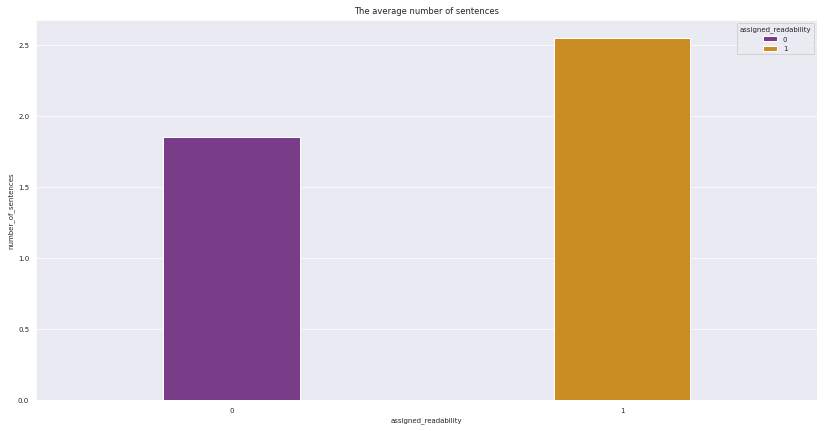

In [ ]:
# Alternative Visualisation
#Formating
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['figure.figsize'] = (14, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(data_grp_nos.assigned_readability,
            data_grp_nos.number_of_sentences,
            hue='assigned_readability',
            data=data_grp_nos,
            dodge=False,
            palette="CMRmap")

#The title of our charts
plt.title("The average number of sentences")

#Change the width of the bar chart plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()

Average number of tokens total, sourcewise, classwise

In [ ]:
def num_tokens(txt):
  doc = nlp(txt)
  return len([i for i in doc])

In [ ]:
data['number_of_tokens'] = data['definitions'].apply(lambda x : num_tokens(str(x)))

In [ ]:
print('Number of Sentences (Average):=>', round(data['number_of_tokens'].mean(),2))
print('Number of Sentences (Max):=>', data['number_of_tokens'].max())
print('Number of Sentences (Min):=>', data['number_of_tokens'].min())
print('Number of Sentences (Median):=>', data['number_of_tokens'].median())

Number of Sentences (Average):=> 48.23
Number of Sentences (Max):=> 601
Number of Sentences (Min):=> 1
Number of Sentences (Median):=> 46.0


In [ ]:
# Check
print(data[data['number_of_tokens']==601].iloc[0,:]['terms'])
print(data[data['number_of_tokens']==601].iloc[0,:]['definitions'])
print(data[data['number_of_tokens']==601].iloc[0,:]['source'])
print(data[data['number_of_tokens']==601].iloc[0,:]['assigned_readability'])

Dim Sum Bond
Dim sum bond' is a slang term for bonds denominated in Chinese renminbi and issued in Hong Kong. Dim sum bonds are attractive to foreign investors who desire exposure to renminbi-denominated assets, but are restricted by China's capital controls from investing in domestic Chinese debt.investopedia140.1813.2013.4115.311.771415.7515.2215th and 16th grade81.976.3536.454.248.3333333340.39 Direct CostA direct cost is a price that can be directly tied to the production of specific goods or services. A direct cost can be traced to the cost object, which can be a service, product, or department. Direct and indirect costs are the two major types of expenses or costs that companies can incur. Direct costs are often variable costs, meaning they fluctuate with production levels such as inventory. However, some costs, such as indirect costs are more difficult to assign to a specific product. Examples of indirect costs include depreciation and administrative expenses.

                source  number_of_tokens
0            economist         80.455142
1         investopedia         64.693744
2                  sam         42.078550
3             palgrave         37.978344
4            6_8_louis         28.792398
5           9_12_louis         23.234043
6   ncert_class12_econ         20.634146
7                  fmi         20.124031
8                ncert         19.747826
9                  zvi         19.546748
10                opod         16.800759
11          ncert_kest         16.396226
12           pre_louis         15.527778
13                prin         14.333333
14       ncert_keec111          3.863158


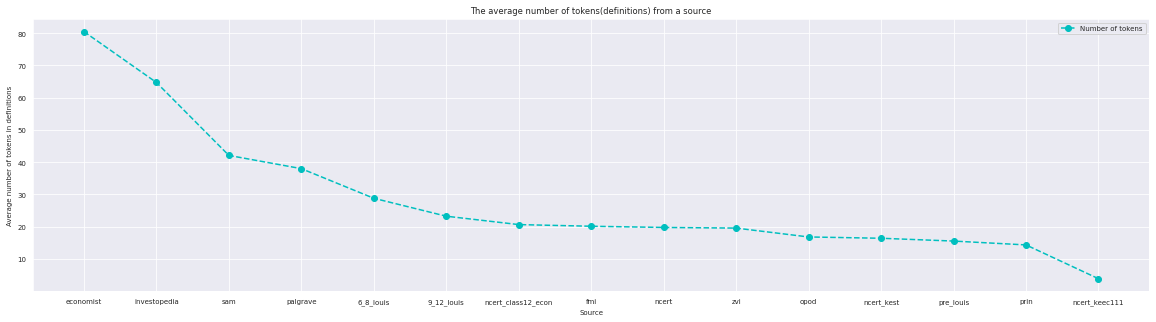

In [ ]:
# Source wise distribution of "number of tokens/terms"
data_grp_nos = data.groupby('source')['number_of_tokens'].mean().sort_values(ascending = False).reset_index()
print(data_grp_nos)
# Plot the same
# Data Visualisation
# Resize the  figure size
plt.figure(figsize=(20, 5))

# Here we are ploting the line chart using plt.plot
plt.plot(data_grp_nos.source, data_grp_nos.number_of_tokens,'o--c')

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Source')
plt.ylabel('Average number of tokens in definitions')

plt.title("The average number of tokens(definitions) from a source")
plt.legend(['Number of tokens']);

In [ ]:
data.groupby('assigned_readability')['number_of_tokens'].mean()

assigned_readability
0    32.291394
1    59.770121
Name: number_of_tokens, dtype: float64

   assigned_readability  number_of_tokens
0                     1         59.770121
1                     0         32.291394


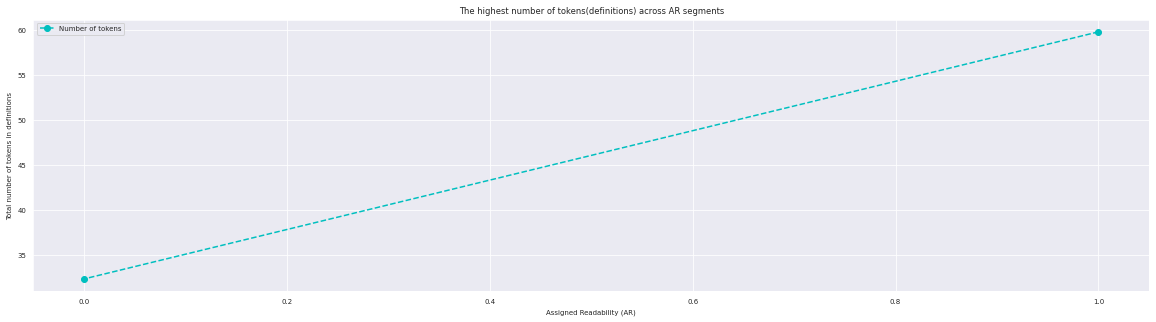

In [ ]:
# Source wise distribution of "number of sentences/terms"
# data.groupby('source')['number_of_sentences'].mean()
data_grp_nos = data.groupby('assigned_readability')['number_of_tokens'].mean().sort_values(ascending = False).reset_index()
print(data_grp_nos)
# Plot the same
# Data Visualisation
# Resize the  figure size
plt.figure(figsize=(20, 5))

# Here we are ploting the line chart using plt.plot
plt.plot(data_grp_nos.assigned_readability, data_grp_nos.number_of_tokens, 'o--c')

# In here we are writing the Labels and Title for the plot chart
plt.xlabel('Assigned Readability (AR)')
plt.ylabel('Total number of tokens in definitions')

plt.title("The highest number of tokens(definitions) across AR segments")
plt.legend(['Number of tokens']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


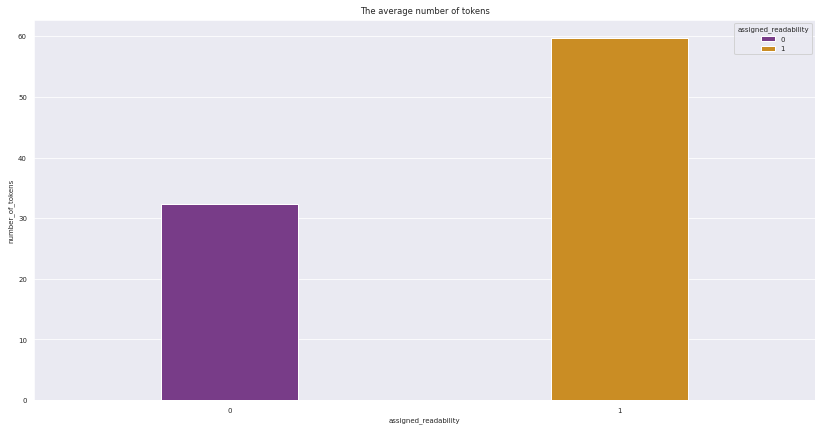

In [ ]:
# Alternative Visualisation
#Formating
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['figure.figsize'] = (14, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(data_grp_nos.assigned_readability,
            data_grp_nos.number_of_tokens,
            hue='assigned_readability',
            data=data_grp_nos,
            dodge=False,
            palette="CMRmap")

#The title of our charts
plt.title("The average number of tokens")

#Change the width of the bar chart plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()